## Importing packages

In [3]:
from PIL import Image
from PIL.ExifTags import TAGS
import numpy as np
import argparse
import cv2
import ezdxf
import open3d as o3d
import matplotlib.pyplot as plt
import math
import os
import copy

import geomapi
import geomapi.utils.imageutils as iu
import geomapi.utils.geometryutils as gmu

## inputs

In [2]:
# # open the image
# image = Image.open("holistically-nested-edge-detection\images\P0024930kopie.jpg")
 
# print("filename: ", image. filename)
# print("Format: ", image.format)
# print("Mode: ", image.mode)
# print("Width: ", image.width)
# print("Height: ", image.height)

filename:  holistically-nested-edge-detection\images\P0024930kopie.jpg
Format:  JPEG
Mode:  RGB
Width:  1728
Height:  980


Masking image

In [5]:

# # https://pyimagesearch.com/2021/01/19/image-masking-with-opencv/
# # load the original input image and display it to our screen
# image = cv2.imread("holistically-nested-edge-detection\images\P0024930kopie.jpg")

# # cv2.imshow("Original", image)
# # a mask is the same size as our image, but has only two pixel
# # values, 0 and 255 -- pixels with a value of 0 (background) are
# # ignored in the original image while mask pixels with a value of
# # 255 (foreground) are allowed to be kept
# mask = np.zeros(image.shape[:2], dtype="uint8")
# cv2.rectangle(mask, (150, 0), (280, 980), 255, -1)
# # cv2.imshow("Rectangular Mask", mask)
# masked = cv2.bitwise_and(image, image, mask=mask)
# # cv2.imshow("Mask Applied to Image", masked)
# cv2.imwrite('holistically-nested-edge-detection\images\masked.jpg',masked)
# cv2.waitKey(0)

-1

Importing dxf lines

In [4]:
def extract_lines(dxf_path):
    dwg = ezdxf.readfile(dxf_path)
    modelspace = dwg.modelspace()
    
    lines = []
    for entity in modelspace:
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            color = entity.dxf.color
            layer = entity.dxf.layer
            thickness = entity.dxf.lineweight
            lines.append((start, end, color, layer, thickness))
    
    return lines

def create_lineset(line, points):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(np.array(points))
    colors = [line[2]] * len(points)
    pcd.colors = o3d.utility.Vector3dVector(np.array(colors) / 255.0)
    
    lineset = o3d.geometry.LineSet.create_from_point_cloud_correspondences(pcd, pcd, [(i, i+1) for i in range(len(points)-1)])
    lineset.paint_uniform_color(np.array(line[2]) / 255.0)
    lineset.line_width = line[4]
    
    return lineset

def cad_lines_to_linesets(dxf_path):
    doc = ezdxf.readfile(dxf_path)
    modelspace = doc.modelspace()

    for line in modelspace.query("LINE"):
        print(line)  # Print LINE entity

    layer_colors = {}  # Dict to store layer colors
    for layer in doc.layers:
        layer_name = layer.dxf.name.lower()
        color = layer.get_color()
        if color is None:
            color = (255, 255, 255)
        layer_colors[layer_name] = np.array(color)

    linesets = []  # List to store LineSets
    for line in modelspace.query("LINE"):
        start = np.array([line.dxf.start[0], line.dxf.start[1], 0])
        end = np.array([line.dxf.end[0], line.dxf.end[1], 0])
        layer_name = line.dxf.layer.lower()

        line_set = o3d.geometry.LineSet()
        line_set.points = o3d.utility.Vector3dVector([start, end])
        line_set.lines = o3d.utility.Vector2iVector([[0, 1]])
        # line_set.paint_uniform_color(layer_colors[layer_name]/255)
        # line_set.line_width = 2
        linesets.append(line_set)

    return linesets

def show_linesets(linesets):
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    
    for lineset in linesets:
        vis.add_geometry(lineset)
    
    vis.run()
    vis.destroy_window()

dxf_path = "D:/studenten/LouisD/DR NIEUW/Welkenraedt relevé de voies.dxf"
linesets = cad_lines_to_linesets(dxf_path)
# print(linesets)
# show_linesets(linesets)

LINE(#5E86)
LINE(#5E87)
LINE(#5E88)
LINE(#5E89)
LINE(#5E8A)
LINE(#5E8B)
LINE(#5E8C)
LINE(#5E8D)
LINE(#5E8E)
LINE(#5E8F)
LINE(#5E90)
LINE(#5E91)
LINE(#5E92)
LINE(#5E93)
LINE(#5E94)
LINE(#5E95)
LINE(#5E96)
LINE(#5E97)
LINE(#5E98)
LINE(#5E99)
LINE(#5E9A)
LINE(#5E9B)
LINE(#5E9C)
LINE(#5E9D)
LINE(#5E9E)
LINE(#5E9F)
LINE(#5EA0)
LINE(#5EA1)
LINE(#5EA2)
LINE(#5EA3)
LINE(#5EA4)
LINE(#5EA5)
LINE(#5EA6)
LINE(#5EA7)
LINE(#5EA8)
LINE(#5EA9)
LINE(#5EAA)
LINE(#5EAB)
LINE(#5EAC)
LINE(#5EAD)
LINE(#5EAE)
LINE(#5EAF)
LINE(#5EB0)
LINE(#5EB1)
LINE(#5EB2)
LINE(#5EB3)
LINE(#5EB4)
LINE(#5EB5)
LINE(#5EB6)
LINE(#5EB7)
LINE(#5EB8)
LINE(#5EB9)
LINE(#5EBA)
LINE(#5EBB)
LINE(#5EBC)
LINE(#5EBD)
LINE(#5EBE)
LINE(#5EBF)
LINE(#5EC0)
LINE(#5EC1)
LINE(#5EC2)
LINE(#5EC3)
LINE(#5EC4)
LINE(#5EC5)
LINE(#5EC6)
LINE(#5EC7)
LINE(#5EC8)
LINE(#5EC9)
LINE(#5ECA)
LINE(#5ECB)
LINE(#5ECC)
LINE(#5ECD)
LINE(#5ECE)
LINE(#5ECF)
LINE(#5ED0)
LINE(#5ED1)
LINE(#5ED2)
LINE(#5ED3)
LINE(#5ED4)
LINE(#5ED5)
LINE(#5ED6)
LINE(#5ED7)
LINE(#5ED8)
LINE

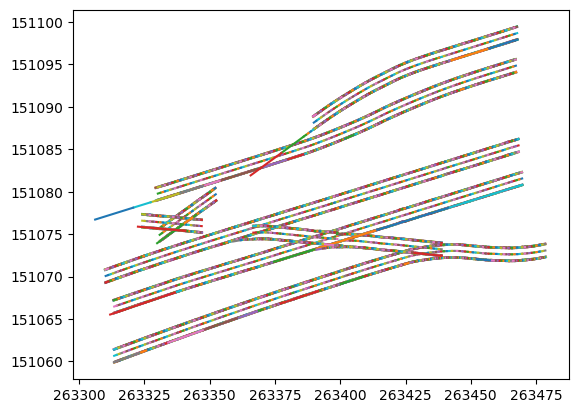

In [3]:
# Load the DXF file
doc = ezdxf.readfile("D:/studenten/LouisD/DR NIEUW/Welkenraedt relevé de voies.dxf")

# Extract all line entities from the DXF file
msp = doc.modelspace()
lines = msp.query("LINE")

# Plot all the lines using Matplotlib
for line in lines:
    x1, y1, _ = line.dxf.start
    x2, y2, _ = line.dxf.end
    plt.plot([x1, x2], [y1, y2])

plt.show()


In [5]:
im = cv2.imread("holistically-nested-edge-detection/hed_image.png")
h_0, h_1 = 56,70
w_0, w_1 = 188,196
print(im[h_0:h_1,w_0:w_1])

[[[222 222 222]
  [206 206 206]
  [167 167 167]
  [114 114 114]
  [ 85  85  85]
  [134 134 134]
  [184 184 184]
  [227 227 227]]

 [[224 224 224]
  [211 211 211]
  [173 173 173]
  [116 116 116]
  [ 87  87  87]
  [133 133 133]
  [183 183 183]
  [226 226 226]]

 [[226 226 226]
  [214 214 214]
  [177 177 177]
  [118 118 118]
  [ 87  87  87]
  [134 134 134]
  [182 182 182]
  [226 226 226]]

 [[226 226 226]
  [215 215 215]
  [179 179 179]
  [120 120 120]
  [ 87  87  87]
  [134 134 134]
  [181 181 181]
  [225 225 225]]

 [[226 226 226]
  [215 215 215]
  [179 179 179]
  [121 121 121]
  [ 87  87  87]
  [134 134 134]
  [181 181 181]
  [224 224 224]]

 [[226 226 226]
  [215 215 215]
  [179 179 179]
  [122 122 122]
  [ 85  85  85]
  [130 130 130]
  [180 180 180]
  [223 223 223]]

 [[225 225 225]
  [214 214 214]
  [178 178 178]
  [122 122 122]
  [ 84  84  84]
  [129 129 129]
  [178 178 178]
  [222 222 222]]

 [[223 223 223]
  [211 211 211]
  [177 177 177]
  [122 122 122]
  [ 84  84  84]
  [126 126

Crop image

In [37]:
# Open the image file
image = Image.open("D:/studenten/LouisD/DR NIEUW/SpoorCentraal2.jpg")

# Define the crop region
left = 5900
top = 4300
right = 7400
bottom = 5500
# Crop the image
cropped_image = image.crop((left, top, right, bottom))

# Show the image
cropped_image.show()

# Save the cropped image
cropped_image.save("D:/studenten/LouisD/DR NIEUW/Output/Cropped2.jpg")

Masking image

In [41]:
# Open the image file
image = Image.open("D:/studenten/LouisD/DR NIEUW/Output/Cropped2.jpg")

# Convert the image to a NumPy array
image_array = np.array(image)

# Create a binary mask with the same shape as the image
mask = np.zeros(image_array.shape[:2], dtype=np.uint8)

# Define the two areas to be masked
area1 = (30, 0, 200, 1200)
area2 = (1320, 0, 1480, 1200)

# Set the pixels in the mask corresponding to the two areas to 1
mask[area1[1]:area1[3], area1[0]:area1[2]] = 1
mask[area2[1]:area2[3], area2[0]:area2[2]] = 1

# Set all pixels outside of the two areas to 0
mask = np.where(mask, 1, 0)
masked_image_array = image_array * mask[..., np.newaxis]

# Convert the masked image array to a compatible data type
masked_image_array = masked_image_array.astype(np.uint8)

# Create a new image from the masked array
masked_image = Image.fromarray(masked_image_array)

# Save the masked image
masked_image.save("D:/studenten/LouisD/DR NIEUW/Output/masked2.jpg")

drawing lines Canny

C:\Users\r0710132\AppData\Local\Temp\ipykernel_6276\1280943943.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  rico = (lin[3]-lin[1])/(lin[2]-lin[0])


True

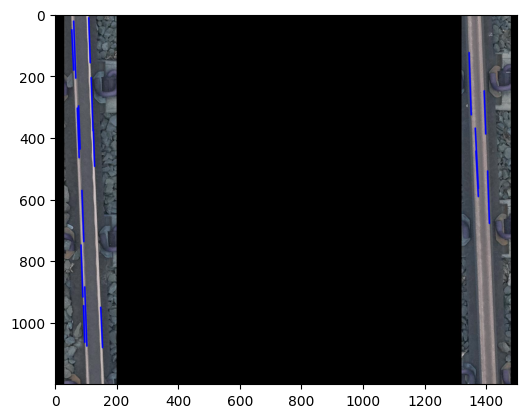

In [46]:
imPath = "D:/studenten/LouisD/DR NIEUW/Output/masked2.jpg"
src_img = cv2.imread("D:/studenten/LouisD/DR NIEUW/Output/masked2.jpg")
image = cv2.imread(imPath)

# cv2.imshow('Original Image',src_img)

dst_img = cv2.Canny(image, 50, 200, None, 3)

linesP = cv2.HoughLinesP(dst_img, 1, np.pi / 180, 100, None, 120,10)

doc = ezdxf.new()
# create a new model space entity container
msp = doc.modelspace()

lines = []
col_names = ("LineName", "StartX", "StartY", "EndX", "EndY")
image_name_with_extension = os.path.basename(imPath)
image_name = os.path.splitext(image_name_with_extension)[0]

for i in range(0, len(linesP)):
    lin = linesP[i][0]
    rico = (lin[3]-lin[1])/(lin[2]-lin[0])
    if rico < 1000 and rico > -1000:
        start = (lin[0], lin[1])
        end = (lin[2], lin[3])
        lines.append([image_name,lin[0], lin[1], lin[2], lin[3]])
        cv2.line(image, start, end, (0,0,255), 3, cv2.LINE_AA)
        line = msp.add_line(start, end)
        line.dxf.color = 2  # set line color to green
        # cv2.imshow("Image with lines", src_img)
        # cv2.waitKey(0)
    
doc.saveas('Output/ExportLinesCanny2.dxf')
with open('Output/LinePointsCanny2.txt', 'w') as filehandle:
    for listitem in lines:
        for element in listitem:
            filehandle.write(f'{element} ')
        filehandle.write('\n')
plt.imshow(image)
cv2.imwrite('D:/studenten/LouisD/DR NIEUW/Output/ResultCanny2.jpg',image)

Draw edge detection lines on original (not masked) image

[['masked2', 5996, 5184, 6003, 5377], ['masked2', 7244, 4424, 7251, 4627], ['masked2', 6048, 5250, 6054, 5382], ['masked2', 5972, 4604, 5978, 4766], ['masked2', 5960, 4322, 5967, 4508], ['masked2', 5954, 4350, 5960, 4482], ['masked2', 6009, 4311, 6014, 4458], ['masked2', 5987, 4871, 5993, 5038], ['masked2', 6017, 4505, 6023, 4679], ['masked2', 5984, 5048, 5990, 5218], ['masked2', 7304, 4808, 7310, 4979], ['masked2', 5992, 5245, 5996, 5365], ['masked2', 7264, 4669, 7274, 4866], ['masked2', 7293, 4548, 7298, 4689], ['masked2', 5976, 4597, 5981, 4738], ['masked2', 6024, 4673, 6028, 4794], ['masked2', 7266, 4743, 7274, 4892]]


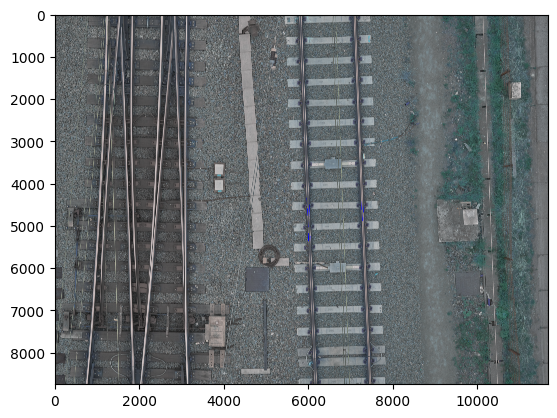

In [47]:
linesOrig=copy.deepcopy(lines)
imOrig = cv2.imread("D:/studenten/LouisD/DR NIEUW/SpoorCentraal2.jpg")

for i in range(len(lines)):
    linesOrig[i][1] = lines[i][1] + left
    linesOrig[i][2] = lines[i][2] + top
    linesOrig[i][3] = lines[i][3] + left
    linesOrig[i][4] = lines[i][4] + top

    start = (linesOrig[i][1], linesOrig[i][2])
    end = (linesOrig[i][3],linesOrig[i][4])
    cv2.line(imOrig, start, end, (0,0,255), 5, cv2.LINE_AA)

print(linesOrig)
plt.imshow(imOrig)

Drawing lines HED

True

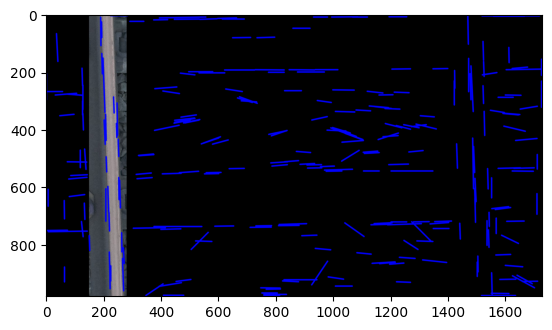

In [27]:
src_img = cv2.imread("holistically-nested-edge-detection/hed_image.png")
image = cv2.imread("holistically-nested-edge-detection/images/masked.jpg")
# cv2.imshow('Original Image',src_img)

dst_img = cv2.Canny(src_img, 50, 200, None, 3)
gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)

linesP = cv2.HoughLinesP(dst_img, 1, np.pi / 180, 50, None, 50, 10)

doc = ezdxf.new()
# create a new model space entity container
msp = doc.modelspace()

for i in range(0, len(linesP)):
    lin = linesP[i][0]
    start = (lin[0], lin[1])
    end = (lin[2], lin[3])
    cv2.line(image, start, end, (0,0,255), 3, cv2.LINE_AA)
    line = msp.add_line(start, end)
    line.dxf.color = 2  # set line color to green
# cv2.imshow("Image with lines", src_img)
# cv2.waitKey(0)
doc.saveas('Output/ExportLinesHED.dxf')
plt.imshow(image)
cv2.imwrite('holistically-nested-edge-detection/images/HoughLinesPHED.jpg',image)
